In [1]:
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths to your zip files and extraction directory
cats_zip_path = r"D:\assignment\dl\cats-20230929T100816Z-001 (1) (1).zip"
dogs_zip_path = r"D:\assignment\dl\dogs-20230929T100824Z-001 (1) (1).zip"
extraction_dir = r"D:\assignment\dl\cats_dogs/"

# Create extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extracting cat images
with zipfile.ZipFile(cats_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Extracting dog images
with zipfile.ZipFile(dogs_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print("Extraction complete.")

# Directories for training and testing data
cats_dir = os.path.join(extraction_dir, 'cats')
dogs_dir = os.path.join(extraction_dir, 'dogs')
train_dir = os.path.join(extraction_dir, 'train')
test_dir = os.path.join(extraction_dir, 'test')

# Create necessary directories
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'dogs'), exist_ok=True)

# List all images in cats and dogs directories
cat_images = [f for f in os.listdir(cats_dir) if os.path.isfile(os.path.join(cats_dir, f))]
dog_images = [f for f in os.listdir(dogs_dir) if os.path.isfile(os.path.join(dogs_dir, f))]

# Split into train and test sets
train_cats, test_cats = train_test_split(cat_images, test_size=0.2, random_state=42)
train_dogs, test_dogs = train_test_split(dog_images, test_size=0.2, random_state=42)

# Move cat images to train and test directories
for img in train_cats:
    src = os.path.join(cats_dir, img)
    dst = os.path.join(train_dir, 'cats', img)
    try:
        shutil.move(src, dst)
    except FileNotFoundError:
        print(f"File not found: {src}")

for img in test_cats:
    src = os.path.join(cats_dir, img)
    dst = os.path.join(test_dir, 'cats', img)
    try:
        shutil.move(src, dst)
    except FileNotFoundError:
        print(f"File not found: {src}")

# Move dog images to train and test directories
for img in train_dogs:
    src = os.path.join(dogs_dir, img)
    dst = os.path.join(train_dir, 'dogs', img)
    try:
        shutil.move(src, dst)
    except FileNotFoundError:
        print(f"File not found: {src}")

for img in test_dogs:
    src = os.path.join(dogs_dir, img)
    dst = os.path.join(test_dir, 'dogs', img)
    try:
        shutil.move(src, dst)
    except FileNotFoundError:
        print(f"File not found: {src}")

print("Data organization complete.")


Extraction complete.
Data organization complete.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary')

Found 1600 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(
                        test_dir, 
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary')

Found 400 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers, models

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(128, (3,3,), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\gayatri\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    loss='binary_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


C:\Users\gayatri\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 80/100 ━━━━━━━━━━━━━━━━━━━━ 15s 763ms/step - accuracy: 0.5054 - loss: 0.7033

C:\Users\gayatri\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 698ms/step - accuracy: 0.5047 - loss: 0.7002 - val_accuracy: 0.5025 - val_loss: 0.6558
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 520ms/step - accuracy: 0.5280 - loss: 0.6903 - val_accuracy: 0.5550 - val_loss: 0.6584
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 478ms/step - accuracy: 0.5460 - loss: 0.6892 - val_accuracy: 0.5000 - val_loss: 0.6654
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 436ms/step - accuracy: 0.5298 - loss: 0.6910 - val_accuracy: 0.5025 - val_loss: 0.6591
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 439ms/step - accuracy: 0.5381 - loss: 0.6803 - val_accuracy: 0.5050 - val_loss: 0.6512
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 463ms/step - accuracy: 0.5306 - loss: 0.6863 - val_accuracy: 0.6175 - val_loss: 0.6367
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 458ms/step - accuracy: 0.6017 - loss: 0.6761 - val_accuracy: 0.6200 - val_loss: 0.6270
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 437ms/step - accuracy: 0.6042 - loss: 0.6647 - val

In [14]:
import matplotlib.pyplot as plt



In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [16]:
epoch = range(1, len(acc)+1)

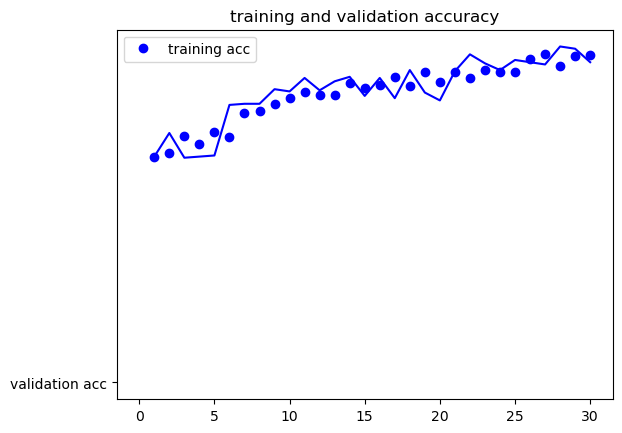

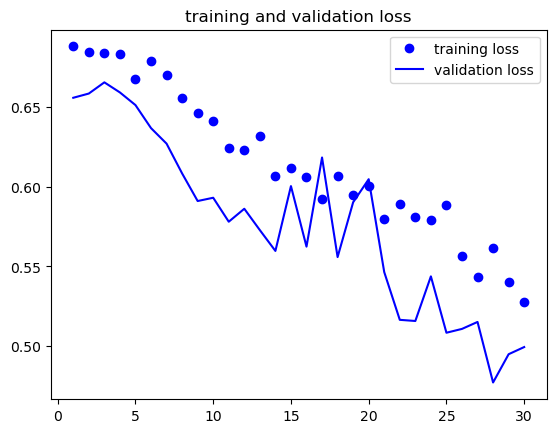

In [17]:
plt.plot(epoch, acc, 'bo', label = 'training acc')
plt.plot(epoch, val_acc, 'b', 'validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch, loss, 'bo', label = 'training loss')
plt.plot(epoch, val_loss, 'b', label = 'validation loss')
plt.title('training and validation loss')
plt.legend()

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image 

In [21]:
def predict_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(150, 150))
    except Exception as e:
        print(f"Error loading image: {e}")
        return
    
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0
    
    prediction = model.predict(img_tensor)
    if prediction[0] > 0.5:
        print(f"The image at {img_path} is a dog")
    else:
        print(f"The image at {img_path} is a cat")

In [23]:
predict_image(r"D:\assignment\dl\cats_dogs\test\dogs\dog.99.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
The image at D:\assignment\dl\cats_dogs\test\dogs\dog.99.jpg is a dog


In [32]:
predict_image(r"D:\assignment\dl\cats_dogs\train\cats\cat.57.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The image at D:\assignment\dl\cats_dogs\train\cats\cat.57.jpg is a cat


In [33]:
predict_image(r"D:\assignment\dl\cats_dogs\train\cats\cat.48.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The image at D:\assignment\dl\cats_dogs\train\cats\cat.48.jpg is a dog


In [34]:
predict_image(r"D:\assignment\dl\cats_dogs\train\cats\cat.54.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The image at D:\assignment\dl\cats_dogs\train\cats\cat.54.jpg is a cat


In [35]:
predict_image(r"D:\assignment\dl\cats_dogs\train\dogs\dog.44.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image at D:\assignment\dl\cats_dogs\train\dogs\dog.44.jpg is a dog
